<a href="https://colab.research.google.com/github/ddekun/Intro_Neural_Networks/blob/lesson2/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt

In [ ]:
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Train shape', train_images.shape)
print('Test shape', test_images.shape)

Train shape (60000, 28, 28)
Test shape (10000, 28, 28)


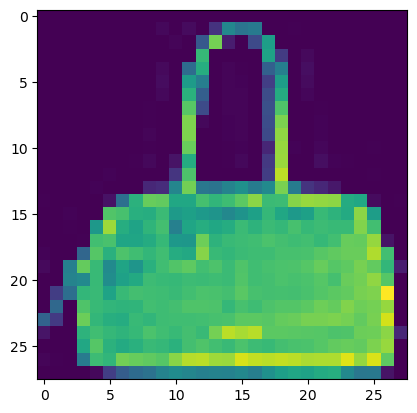

8


In [ ]:
n = 2510
plt.imshow(train_images[n,:,:])
plt.show()
print(train_labels[n])

In [ ]:
# Нормализация
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1
# Сглаживание
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [ ]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.

In [ ]:
n = [10, 50, 100, 150, 200, 250, 300]

for i in n:
    
  model = Sequential(name='my_model')
  model.add(Dense(128, activation='relu', input_shape=(784,)))  
  model.add(Dense(i, activation='tanh')) 
  model.add(Dense(10, activation='softmax'))

  # Компилируем сеть с оптимизатором , функцией потерь и метрикой

  model.compile(
    optimizer='adam', # оптимизатор
    loss='categorical_crossentropy', # функция потерь
    metrics=['accuracy'], # метрика
  ) 


  # Обучаем сеть

  hh = model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=15,
    batch_size=32, 
    validation_split=0.2,
    verbose=0
  )

  # Оцениваем качество

  test_loss, test_accuracy = model.evaluate(test_images, y_tt, verbose=0)

  print(f'Количество нейронов {i}: Train - {hh.history.get("accuracy")[-1]:.3f}; Test - {test_accuracy:.3f}')

Количество нейронов 10: Train - 0.912; Test - 0.877
Количество нейронов 50: Train - 0.918; Test - 0.874
Количество нейронов 100: Train - 0.925; Test - 0.877
Количество нейронов 150: Train - 0.927; Test - 0.886
Количество нейронов 200: Train - 0.931; Test - 0.878
Количество нейронов 250: Train - 0.931; Test - 0.879
Количество нейронов 300: Train - 0.930; Test - 0.880


In [ ]:
def train_evaluate_model(model, epochs=15, batch_size=32, optimizer='adam'):
  # Компилируем сеть с оптимизатором , функцией потерь и метрикой

  model.compile(
    optimizer=optimizer, # оптимизатор
    loss='categorical_crossentropy', # функция потерь
    metrics=['accuracy'], # метрика
  ) 
    
  hh = model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=epochs,
    batch_size=32, 
    validation_split=0.2,
    verbose=0
  )

  test_loss, test_acc = model.evaluate(test_images, y_tt, verbose=0)

  return hh.history.get("accuracy")[-1], test_acc

In [ ]:
model_2layers = Sequential(name='2_Layer_model')
model_2layers.add(Dense(128, activation='relu', input_shape=(784,)))  
model_2layers.add(Dense(190, activation='tanh')) 
model_2layers.add(Dense(10, activation='softmax'))
print(f'Количество параметров 2 слоя: {model_2layers.count_params()}')

train_accuracy, test_accuracy = train_evaluate_model(model_2layers)

print(f'Train - {train_accuracy:.3f}; Test - {test_accuracy:.3f}')

Количество параметров 2 слоя: 126900
Train - 0.928; Test - 0.880


In [ ]:
model_3layers = Sequential(name='3_Layer_model')
model_3layers.add(Dense(128, activation='relu', input_shape=(784,)))  

for k in range(2):
  model_3layers.add(Dense(10+(10-k)*10, activation='tanh')) 

model_3layers.add(Dense(10, activation='softmax')) 
print(f'Количество параметров 3 слоя: {model_3layers.count_params()}')

train_accuracy, test_accuracy = train_evaluate_model(model_3layers)

print(f'Train - {train_accuracy:.3f}; Test - {test_accuracy:.3f}')

Количество параметров 3 слоя: 126780
Train - 0.919; Test - 0.878


In [ ]:
model_5layers = Sequential(name='5_Layer_model')
model_5layers.add(Dense(128, activation='relu', input_shape=(784,)))  

for k in range(4):
  model_5layers.add(Dense(10+(7-k)*10, activation='tanh')) 

model_5layers.add(Dense(10, activation='softmax')) 
print(f'Количество параметров 5 слоев: {model_5layers.count_params()}')

train_accuracy, test_accuracy = train_evaluate_model(model_5layers)

print(f'Train - {train_accuracy:.3f}; Test - {test_accuracy:.3f}')

Количество параметров 5 слоев: 124290
Train - 0.912; Test - 0.876


In [ ]:
model_10layers = Sequential(name='10_Layer_model')
model_10layers.add(Dense(128, activation='relu', input_shape=(784,)))  

for k in range(3):
  model_10layers.add(Dense(10+(k+7)*10, activation='tanh')) 

model_10layers.add(Dense(10, activation='softmax')) 
print(f'Количество параметров 10 слоев: {model_10layers.count_params()}')

train_accuracy, test_accuracy = train_evaluate_model(model_10layers)

print(f'Train - {train_accuracy:.3f}; Test - {test_accuracy:.3f}')

Количество параметров 10 слоев: 128200
Train - 0.917; Test - 0.877


2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

Оптимизатор - SGD: Train - 0.904; Test - 0.873.
Оптимизатор - RMSProp: Train - 0.915; Test - 0.880.
Оптимизатор - adam: Train - 0.929; Test - 0.883.
Оптимизатор - NAdam: Train - 0.930; Test - 0.879.


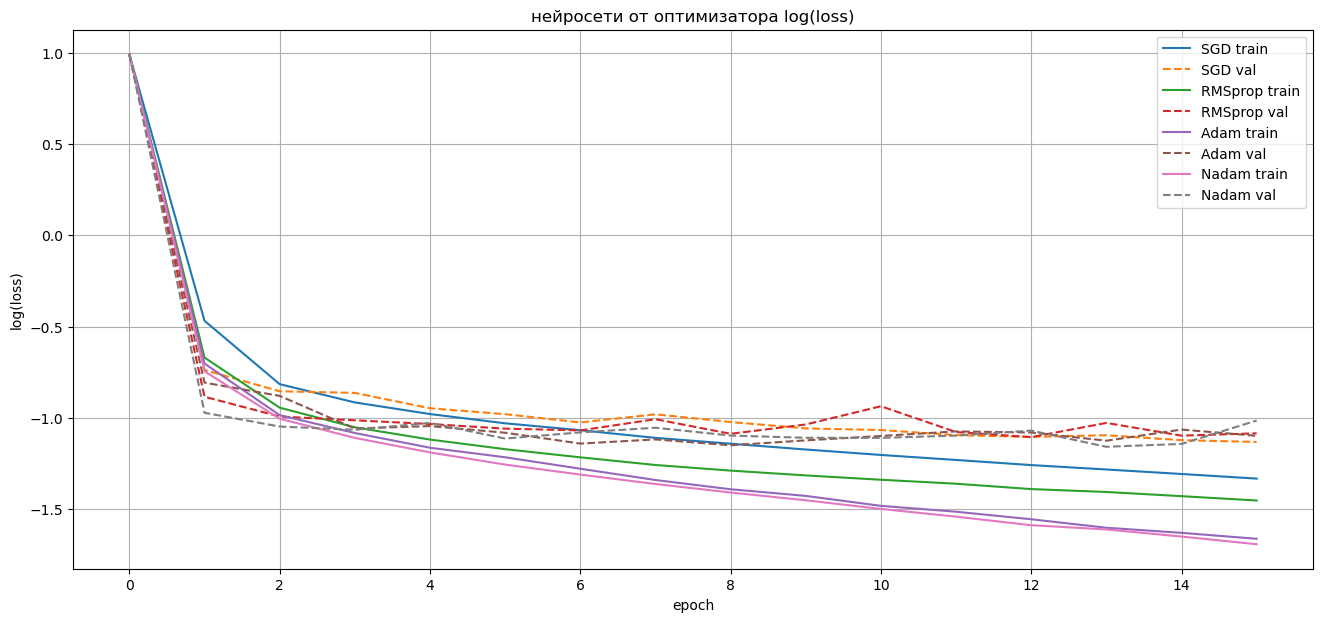

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  
model.add(Dense(200, activation='tanh')) 
model.add(Dense(10, activation='softmax'))

model.save_weights('model.h5')
plt.figure(figsize=(16,7))
epochs = 15
epoch = np.arange(epochs+1)

for optim in ['SGD','RMSProp','adam','NAdam']:

  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(784,)))  
  model.add(Dense(200, activation='tanh')) 
  model.add(Dense(10, activation='softmax'))

  model.load_weights('model.h5')
  
  model.compile(
      optimizer=optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  
  hh0_tr = model.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = model.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  
  # проводим обучение модели 
  hh = model.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, 
                  validation_split=0.2, 
                  verbose = 0
                  )
  
  test_loss, test_acc = model.evaluate(test_images, y_tt, verbose=0)
  print(f'Оптимизатор - {optim}: '
        f'Train - {hh.history.get("accuracy")[-1]:.3f}; '
        f'Test - {test_acc:.3f}.')

  # картинки
  plt.plot(epoch, np.log([hh0_tr[0]]+hh.history['loss']),'-',label = model.optimizer.get_config()['name']+' train')
  plt.plot(epoch, np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = model.optimizer.get_config()['name']+' val')

plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

Улучшить качество классификации на тестовом датасете помогло прменение оптимизатора Adam, и установка количества нейронов в 2-слойной модели около 150. Увеличение слоев модели до 5 (сократилось переобучение).

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  
model.add(Dense(50, activation='tanh')) 
model.add(Dense(10, activation='softmax'))

train_evaluate_model(model, optimizer='adam')

y_pred = model.predict(test_images[:,:])
y_pred_class = np.argmax(y_pred, axis=1)

confusion_matrix(test_labels, y_pred_class)

313/313 [==============================] - 0s 984us/step


array([[832,   2,  15,  36,   1,   1, 103,   0,   9,   1],
       [  0, 967,   0,  27,   1,   0,   5,   0,   0,   0],
       [ 16,   0, 815,  19,  47,   1,  99,   0,   2,   1],
       [ 15,   6,   8, 911,  30,   0,  27,   0,   3,   0],
       [  1,   1, 100,  37, 753,   0, 106,   0,   2,   0],
       [  1,   0,   0,   2,   0, 945,   1,  32,   2,  17],
       [128,   0,  71,  33,  43,   0, 715,   0,  10,   0],
       [  0,   0,   0,   0,   0,  20,   0, 966,   1,  13],
       [  7,   0,   1,   6,   3,   4,  13,   4, 962,   0],
       [  1,   0,   0,   1,   0,   8,   0,  50,   0, 940]], dtype=int64)

In [ ]:
recall_score(test_labels, y_pred_class, labels=np.unique(test_labels), average=None)

array([0.832, 0.967, 0.815, 0.911, 0.753, 0.945, 0.715, 0.966, 0.962,
       0.94 ])

In [ ]:
precision_score(test_labels, y_pred_class, labels=np.unique(test_labels), average=None)

array([0.83116883, 0.99077869, 0.80693069, 0.84981343, 0.85763098,
       0.96527068, 0.66884939, 0.91825095, 0.97073663, 0.96707819])

In [ ]:
f1_score(test_labels, y_pred_class, labels=np.unique(test_labels), average=None)

array([0.83158421, 0.97874494, 0.81094527, 0.87934363, 0.80191693,
       0.95502779, 0.69115515, 0.94152047, 0.96634857, 0.95334686])